In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

import datetime

In [2]:
start = datetime.date(year=2023, month=9, day=1)

In [3]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
dates = [start + datetime.timedelta(days=i) for i in range(364)]

months = []
month_ticks = []
for date in dates:
    month = date.strftime("%b")
    if month not in months:
        months.append(month)
        month_ticks.append((date.isocalendar().week - 34) % 52)

In [69]:
class AsciiLetter:
    def __init__(self, letter: str, matrix: list[list[int]]):
        assert len(letter) == 1
        self.letter = letter

        assert len(matrix) == 7
        self.matrix = matrix

    def __repr__(self) -> str:
        return self.letter

    def __add__(self, other):
        return AsciiText(self, other)

    def __mul__(self, other):
        if not isinstance(other, int) and not isinstance(other, float):
            raise NotImplementedError()
        for rdx, row in enumerate(self.matrix):
            for cdx, col in enumerate(row):
                self.matrix[rdx][cdx] *= other
        return self

In [70]:
class AsciiText:
    def __init__(self, *letters: list[AsciiLetter]):
        self.text = []
        self.matrix = [[] for _ in range(7)]

        for letter in letters:
            self.__add__(letter)

    def __repr__(self) -> str:
        return "".join(self.text)
    
    def __add__(self, other):
        self.text.extend(other.letter)
        for i in range(len(self.matrix)):
            if len(self.matrix[i]) > 0:
                self.matrix[i].append(0)
            self.matrix[i].extend(other.matrix[i])

        return self

    def __iter__(self):
        for c in self.matrix:
            yield c

In [71]:
S = AsciiLetter("S", [
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [1, 1, 1, 0],
])

In [72]:
I = AsciiLetter("I", [
    [1, 1, 1],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [1, 1, 1],
])

In [73]:
N = AsciiLetter("N", [
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1]
])

In [74]:
F = AsciiLetter("F", [
    [1, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 1, 1, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0],
    [1, 0, 0, 0]
])

In [75]:
O = AsciiLetter("O", [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

In [76]:
space = AsciiLetter(" ", [
    [],
    [],
    [],
    [],
    [],
    [],
    []
])

In [77]:
cdot = AsciiLetter("·", [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

In [78]:
n2 = AsciiLetter("2", [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [1, 1, 1, 1]
])

In [79]:
n0 = AsciiLetter("0", [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

In [80]:
n1 = AsciiLetter("1", [
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [1, 1, 1]
])

In [81]:
n3 = AsciiLetter("3", [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

In [82]:
n4 = AsciiLetter("4", [
    [1, 0, 1, 0],
    [1, 0, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 1, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0]
])

In [87]:
text = (S*0.8)+I+N+F+(O*0.75)+space+space+space+space+space+n2+n3+cdot+n2+n4

In [93]:
np.random.seed = 42

commits = np.array([
    [(
        -np.random.uniform(0, 0.5) if commit == 0
        else -np.random.uniform(0.85, 1) if commit == 1
        else -np.random.uniform(0.6, 0.75) if commit == 0.75
        else -np.random.uniform(0.7, 0.85)
    ) for commit in day]
    for day in text]
)

In [94]:
print("There are", len(commits), "days")
print("There are", len(commits[0]), "commits")

There are 7 days
There are 52 commits


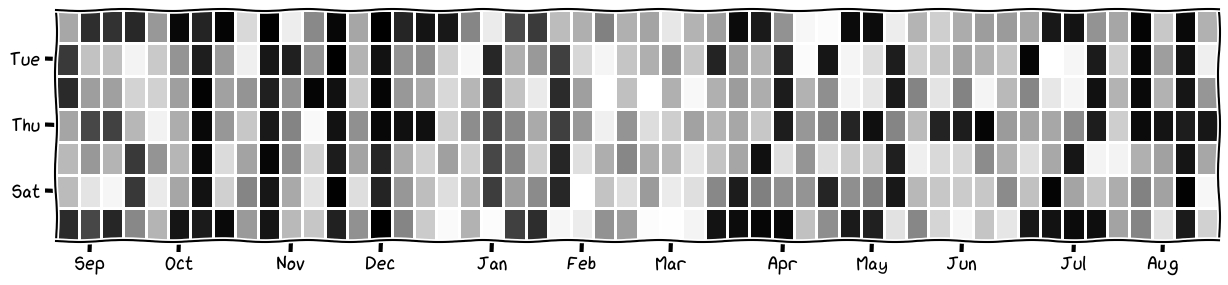

In [95]:
plt.xkcd()
#plt.style.use('dark_background')
plt.rcParams['font.family'] = ['xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS']
#plt.rcParams['font.weight'] = 10

fig, ax = plt.subplots(1, 1, figsize=(15, 3))
im = ax.pcolormesh(
    np.arange(52), # cols
    np.arange(7), # rows
    list(reversed(commits)),
    cmap=mpl.cm.gray,
    edgecolor='w',
    linewidths=1,
    vmin=-1,
    vmax=0,
)

ax.set_yticks([1, 3, 5], labels=reversed(days[1::2]))
ax.set_xticks(month_ticks, labels=months)
fig.savefig("logo.svg")